In [54]:
import matplotlib.pyplot as plt

In [55]:
import pandas as pd
import numpy as np

In [56]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = 'C:\Windows\Fonts\malgun.ttf').get_name()
rc('font',family=font_name)

In [13]:
df = pd.read_csv('Traffic_Accident_2017.csv', encoding = 'cp949')
df.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [29]:
# 파이 차트
# 교통사고가 가장 많이 발생하는 시간대
# int type이기 때문에 뒤에 2자리는 100으로 나눠준 나머지값으로 출력
time = df['발생년월일시'] % 100
time

0        1
1        2
2        2
3        2
4        4
        ..
4060    18
4061    18
4062    19
4063    20
4064    23
Name: 발생년월일시, Length: 4065, dtype: int64

In [35]:
bin = range(-1,24,3)    # 구간정할 때는 앞부분에 -1 해줘야 됨(0을 포함시키고 싶으면 -1부터 시작)
labels = ["0~2","3~5","6~8","9~11","12~14","15~17","18~20","21~23"]
result = pd.cut(time,bin,labels=labels)
result

0         0~2
1         0~2
2         0~2
3         0~2
4         3~5
        ...  
4060    18~20
4061    18~20
4062    18~20
4063    18~20
4064    21~23
Name: 발생년월일시, Length: 4065, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

In [47]:
rs = result.value_counts().sort_index()
rs

0~2      421
3~5      444
6~8      466
9~11     526
12~14    472
15~17    550
18~20    692
21~23    494
Name: 발생년월일시, dtype: int64

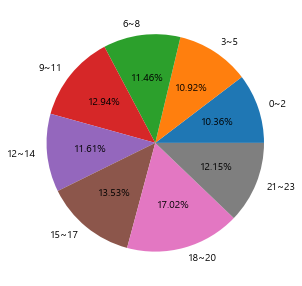

In [52]:
plt.figure(figsize=(5,5))
plt.pie(rs,labels=labels,autopct="%1.2f%%")
plt.show()

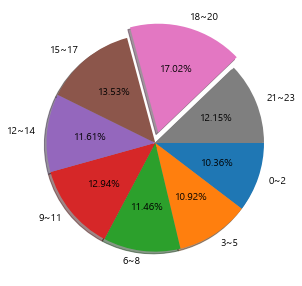

In [93]:
rs = result.value_counts().sort_index()
plt.figure(figsize=(5,5))
# 중심으로부터 거리 설정
explode = [0,0,0,0,0,0,0.10,0]
# counterclock : label 방향 조정(시계/반시계)
plt.pie(rs,labels=labels,autopct="%1.2f%%", counterclock=False, explode = explode, shadow=True)
plt.show()

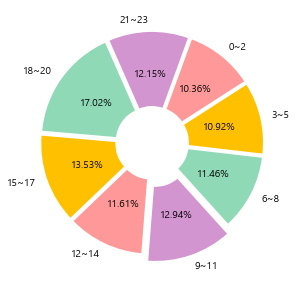

In [90]:
plt.figure(figsize=(5,5))
# explode는 부채꼴이 파이 차트의 중심에서 벗어나는 정도를 설정, labels 개수만큼 설정 해주어야 됨
explode = [0.03, 0.03, 0.03, 0.1, 0.03, 0.03, 0.03, 0.03]
# Hex code를 이용하면 다양한 색상을 지정할 수 있음
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0', '#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
# wedgeprops는 부채꼴 영역의 스타일을 설정
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2}
# startangle는 부채꼴이 그려지는 시작 각도를 설정
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시
plt.pie(rs,labels=labels,autopct="%1.2f%%",startangle=70, counterclock=False, explode=explode, colors = colors, wedgeprops = wedgeprops)
plt.show()

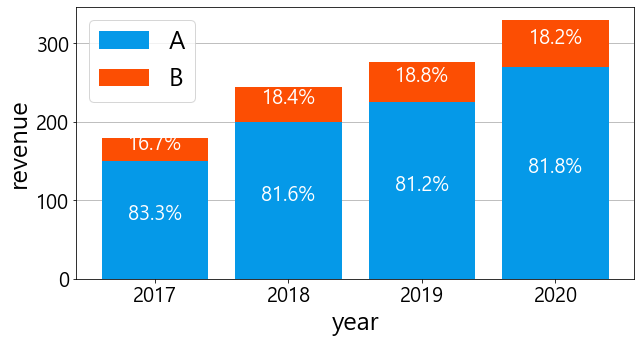

In [145]:
df = pd.DataFrame({'date' : ['2017', '2018', '2019', '2020'], 'A' : [150, 200, 225, 270], 'B' : [30, 45, 52, 60]})

df['total'] = df['A'] + df['B']
df['A_percent'] = round(df['A'] / df['total'] * 100, 1)
df['B_percent'] = round(100 - df['A_percent'], 1)

fig, ax = plt.subplots()
# 피규어 크기
fig.set_size_inches(10, 5)
# 그래프 뒤에 그리드 그리기
ax.set_axisbelow(True)
# y 축만 그리드 그리기
ax.grid(True, axis='y')
# bar 그리기
ax.bar(df['date'], df['A'], label = 'A', color = '#0599e8')
ax.bar(df['date'], df['B'], bottom = df['A'], label = 'B', color = '#fc4e03')
# 라벨 설정
ax.set_xlabel('year', fontsize = 25)
ax.set_ylabel('revenue', fontsize = 25)
# tick 설정
ax.tick_params(axis = 'x', labelsize = 20)
ax.tick_params(axis = 'y', labelsize = 20)
# 범례 표시
ax.legend(fontsize = 25)

# 텍스트 지정
for i in range(len(df['date'])):
    ax.text(df['date'][i], df['A'][i] / 2, str(df['A_percent'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')
    ax.text(df['date'][i], (df['A'][i] + df['A'][i] + df['B'][i])/ 2, str(df['B_percent'][i]) + '%', fontsize = 20, horizontalalignment='center', color = 'w')

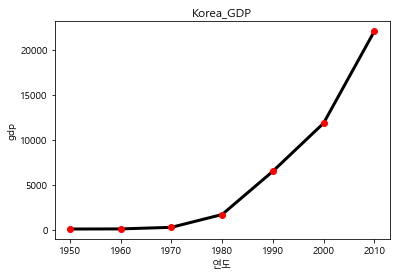

In [105]:
years = range(1950,2020,10)
gdp = [67.0,80.0,257.0,1686.0,6505,11865.3,22105.3]
plt.plot(years, gdp, c = 'k', marker = 'o', lw = 3, mfc = 'r', mec = 'r')
plt.title('Korea_GDP')
plt.ylabel('gdp')
plt.xlabel('연도')
plt.show
plt.savefig('Korea_GDP.png',dpi=600)

c:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


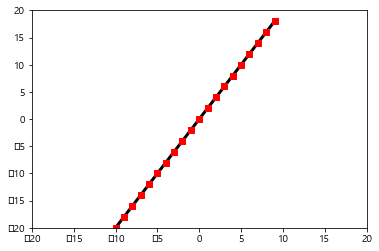

In [110]:
x = [x for x in range(-10,10)]
y = [2*t for t in x]
plt.plot(x,y, c = 'k', marker = 's', lw = 3, mfc = 'r', mec = 'r')
plt.axis([-20,20,-20,20])
plt.show()

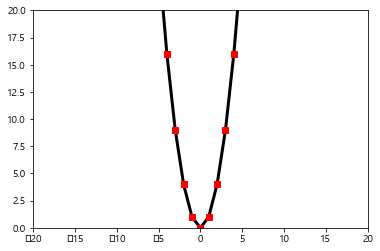

In [112]:
x = [x for x in range(-10,10)]
y = [t**2 for t in x]
plt.plot(x,y, c = 'k', marker = 's', lw = 3, mfc = 'r', mec = 'r')
plt.axis([-20,20,0,20])
plt.show()

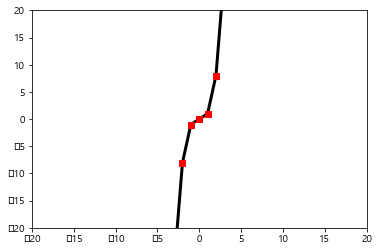

In [114]:
x = [x for x in range(-10,10)]
y = [t**3 for t in x]
plt.plot(x,y, c = 'k', marker = 's', lw = 3, mfc = 'r', mec = 'r')
plt.axis([-20,20,-20,20])
plt.show()

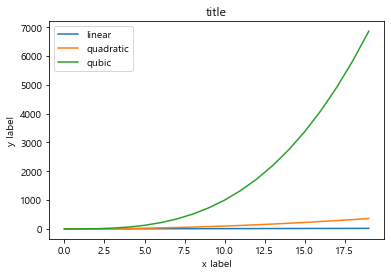

In [117]:
x = [x for x in range(20)]
y = [x**2 for x in range(20)]
z = [x**3 for x in range(20)]

plt.plot(x,x,label='linear')
plt.plot(x,y,label='quadratic')
plt.plot(x,z,label='qubic')

plt.xlabel('x label')
plt.ylabel('y label')
plt.title('title')
plt.legend()
plt.show()

In [179]:
sr = pd.Series([60,85,70,100,100,83,93,85,95,75])
sr.index = ['짱구','훈이','짱아','유리','맹구','철수','도라에몽','진구','퉁퉁이','이슬']
# sr.name = 'English_score'
# sr.index.name = 'name'
sr

짱구       60
훈이       85
짱아       70
유리      100
맹구      100
철수       83
도라에몽     93
진구       85
퉁퉁이      95
이슬       75
dtype: int64

In [141]:
# 가장 큰 값의 개수가 여러개 일 때
# 위에서부터 몇 개 인지 설정
# 1등이 2명일 때 2등을 뽑으려면 3으로 작성해줘야  함
sr.nlargest(5,keep='all')

name
유리      100
맹구      100
퉁퉁이      95
도라에몽     93
훈이       85
진구       85
Name: English_score, dtype: int64

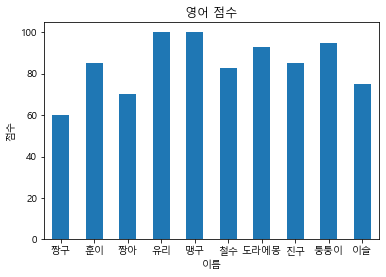

In [158]:
sr50 = sr[sr >= 50]
sr50.plot(kind='bar')
plt.ylabel('점수')
plt.xlabel('이름')
plt.title('영어 점수')
plt.xticks(rotation= 0)
plt.show()

In [ ]:
score = print(int(input("영어 점수를 입력하세요 : ")))
sr[score]

In [196]:
print('-'*20)
print('이름','영어','등급',sep ='\t')
print('-'*20)
sr2 = pd.cut(sr,[-1,59,69,79,89,100],labels=['F','D','C','B','A'])
# pd.concat([sr,sr2], axis=1)
pd.DataFrame([sr,sr2], index = ['영어','등급']).T

--------------------
이름	영어	등급
--------------------


,영어,등급
짱구,60,D
훈이,85,B
짱아,70,C
유리,100,A
맹구,100,A
철수,83,B
도라에몽,93,A
진구,85,B
퉁퉁이,95,A
이슬,75,C


In [190]:
# 퍼센트별 점수 확인(몇 분위 안에 들어오는지 확인)
sr.quantile([0.1,0.5,0.9])

0.1     69.0
0.5     85.0
0.9    100.0
dtype: float64

<AxesSubplot:ylabel='과일'>

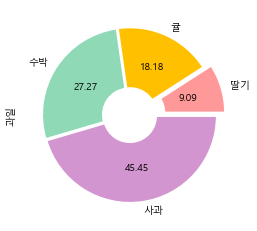

In [211]:
fruit = pd.Series([10,20,30,50],index=['딸기','귤','수박','사과'],name='과일')
# plt.pie(fruit, labels = fruit.index, autopct = '%1.2f%%')
fruit.plot(kind='pie',autopct='%.2f', colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0'], explode = [0.1,0.01,0.01,0.01], wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 2})